# Importing the libraries

In [1]:
import pandas as pd
import numpy as np

# Importing the dataset

In [2]:
df = pd.read_csv('../Data/results_v6.csv')
df.sample(5)

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_ac,p4_avg_save,num_of_monsters,monster_name,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
77151,Sorcerer,26,11,3,Cleric,21,17,3,Cleric,48,...,16,3,3,Gargoyle,2.000,15,52,elemental,0.968814,5
83575,Ranger,31,15,3,Monk,27,11,3,Monk,21,...,13,3,1,Werebear,5.000,10,135,humanoid,0.765634,3
25116,Artificer,35,17,3,Paladin,60,14,3,Rogue,45,...,14,3,10,Monodrone,0.125,15,5,construct,0.969027,5
9636,Artificer,14,15,2,Fighter,18,12,2,Artificer,13,...,15,2,10,Giant Rat,0.125,12,7,beast,0.332871,2
96853,Wizzard,6,10,2,Fighter,7,19,2,Barbarian,14,...,19,2,1,Yuan-ti Pureblood,1.000,11,40,humanoid,0.978784,1


# Cleaning the data

## Dropping the columns that wont help in prediction

In [3]:
df.drop(columns=['monster_name'], inplace=True)
df.head()

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
0,Artificer,38,12,3,Bard,38,13,3,Barbarian,51,...,43,14,3,1,11.00,17,200,elemental,0.869491,5
1,Bard,24,12,3,Barbarian,36,17,3,Sorcerer,13,...,25,15,3,10,0.25,13,22,beast,0.067640,3
2,Ranger,17,12,2,Ranger,12,15,2,Druid,12,...,14,14,2,1,6.00,16,85,elemental,1.000000,2
3,Fighter,32,18,3,Paladin,32,19,3,Paladin,21,...,27,13,3,1,7.00,15,123,aberration,0.285597,3
4,Cleric,26,12,3,Paladin,34,15,3,Cleric,25,...,25,13,3,4,2.00,13,27,humanoid,0.445773,4


## Dropping miswrote data


In [4]:
df.p1_class.value_counts()

p1_class
Cleric       8044
Wizzard      8017
Rogue        7994
Warlock      7991
Paladin      7972
Monk         7947
Fighter      7930
Barbarian    7894
Artificer    7886
Ranger       7878
Sorcerer     7862
Druid        7832
Bard         7829
Name: count, dtype: int64

In [5]:
df = df[df['p1_class'] != '22']
df = df[df['dificulty'] >= 0]
df = df[df['monster_cr'] != -1]
df = df[df['players_level'] <= 5]
df.head()

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
0,Artificer,38,12,3,Bard,38,13,3,Barbarian,51,...,43,14,3,1,11.00,17,200,elemental,0.869491,5
1,Bard,24,12,3,Barbarian,36,17,3,Sorcerer,13,...,25,15,3,10,0.25,13,22,beast,0.067640,3
2,Ranger,17,12,2,Ranger,12,15,2,Druid,12,...,14,14,2,1,6.00,16,85,elemental,1.000000,2
3,Fighter,32,18,3,Paladin,32,19,3,Paladin,21,...,27,13,3,1,7.00,15,123,aberration,0.285597,3
4,Cleric,26,12,3,Paladin,34,15,3,Cleric,25,...,25,13,3,4,2.00,13,27,humanoid,0.445773,4


In [8]:
corr_matrix = df.corr(numeric_only=True)
abs(corr_matrix['dificulty']).sort_values(ascending = False)

dificulty          1.000000
num_of_monsters    0.244224
players_level      0.176650
p3_hp              0.176213
p2_hp              0.174862
p1_hp              0.174097
p4_hp              0.172924
p2_avg_save        0.143443
p3_avg_save        0.143443
p4_avg_save        0.143443
p1_avg_save        0.143443
monster_hp         0.098345
monster_cr         0.055293
monster_ac         0.048960
p1_ac              0.039532
p4_ac              0.037834
p3_ac              0.037415
p2_ac              0.033898
Name: dificulty, dtype: float64

# Sampling the data

In [9]:
X = df.drop(columns=['dificulty'])
X.sample(5)

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_class,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,players_level
17663,Bard,29,15,3,Druid,35,12,3,Warlock,35,...,Artificer,38,15,3,5,2.00,18,39,monstrosity,4
21395,Druid,27,14,3,Warlock,27,13,3,Artificer,32,...,Bard,35,12,3,3,1.00,18,33,construct,5
64965,Ranger,32,12,3,Cleric,33,19,3,Paladin,29,...,Ranger,26,17,3,4,1.00,11,38,monstrosity,4
32346,Cleric,4,18,2,Druid,7,13,2,Barbarian,13,...,Druid,8,15,2,10,0.25,10,19,beast,1
51911,Rogue,36,12,3,Ranger,39,15,3,Bard,40,...,Bard,31,13,3,10,0.25,12,11,undead,4


In [10]:
Y = df['dificulty'].copy()
Y.sample(5)

51589    0.769750
10216    0.776550
87925    0.967154
22267    0.013743
90672    0.545854
Name: dificulty, dtype: float64

# One hot encoding the categorical data

In [11]:
X = pd.get_dummies(X, columns=[ 'p1_class', 'p2_class', 'p3_class', 'p4_class', 'monster_type'])
X.sample(5)

,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
99130,9,13,2,3,15,2,8,16,2,13,...,False,False,False,False,False,False,False,True,False,False
26165,34,17,3,46,15,3,39,17,3,42,...,False,False,False,False,False,True,False,False,False,False
17260,15,14,2,21,17,2,22,12,2,11,...,False,False,False,False,False,False,False,False,False,False
67000,19,13,3,29,19,3,15,15,3,20,...,False,False,False,False,False,False,False,False,False,True
102846,13,15,2,16,13,2,21,15,2,15,...,False,False,False,False,False,False,False,False,False,True


In [12]:
print(len(Y))
print(len(X))

102807
102807


# Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

# Fitting the XGBoost Regression to the dataset

In [14]:
import xgboost as xgb

clfXGB = xgb.XGBRegressor(early_stopping_rounds=10, eval_set=[(X_test, Y_test)])
clfXGB.fit( X_train,
            Y_train,
            verbose=100,
            eval_metric='rmse',
            eval_set=[(X_train, Y_train),(X_test, Y_test)]
            )

[0]	validation_0-rmse:0.34946	validation_1-rmse:0.35050


c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\5e_encounter_predictor\.venv\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\5e_encounter_predictor\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [18:47:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "eval_set" } are not used.

  warnings.warn(smsg, UserWarning)


[99]	validation_0-rmse:0.16914	validation_1-rmse:0.18743


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None,
             eval_set=[(       p1_hp  p1_ac  p1_avg_save  p2_hp  p2_ac  p2_avg_save  p3_hp  p3_ac  \
64192     26     11            3     27     16            3     18     17   
11848     48     15            3     38     14            3     42     14   
21871     30     11            3     45     12            3     46     16   
65349     19     12            2     14     10            2     16     10   
85474     39...
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# Predicting the using the model

In [16]:
clfXGB.score(X_test, Y_test)

0.7790527727816521

In [17]:
from random import randint

def predict(model,test):
    input_test = randint(0, len(test))
    row_input = pd.DataFrame(test.iloc[input_test]).T
    print('Input: ')
    display(row_input)
    print(f'The combat was between 4 players level {row_input.players_level.values[0]} against {row_input.num_of_monsters.values[0]} monster(s) CR {row_input.monster_cr.values[0]}')
    print('Expected: ', Y.iloc[input_test])
    print('Predicted: ', model.predict(row_input.values)[0])

In [20]:
predict(clfXGB, X_test)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
56100,45,12,3,43,14,3,46,16,3,51,...,False,False,False,False,False,False,True,False,False,False


The combat was between 4 players level 5 against 1 monster(s) CR 2.0
Expected:  0.0
Predicted:  0.9982418


# Seeing the model feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

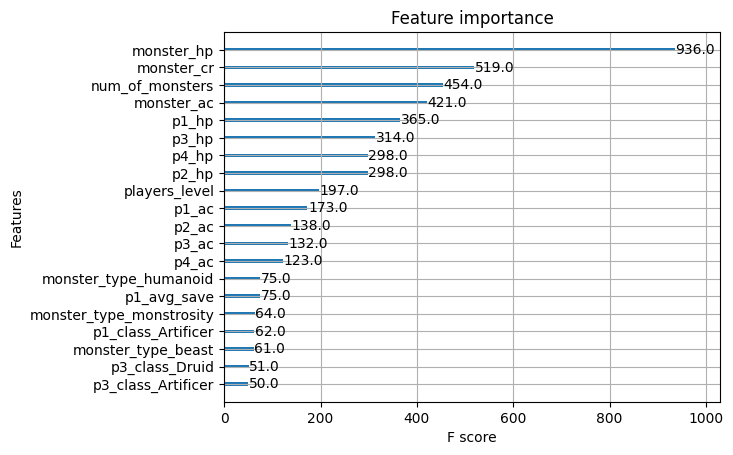

In [24]:
from xgboost import plot_importance

plot_importance(clfXGB, max_num_features=20, importance_type='weight')

# Hyperparameter tuning using GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

def parameter_search(params):
    search = GridSearchCV(xgb.XGBRegressor(
                            subsample=0.9,
                            colsample_bytree=0.5,
                            ),
                            param_grid=params,
                            scoring=['r2','neg_mean_squared_error'],
                            refit='r2',
                            n_jobs=-1,
                            cv=5,
                            verbose=4)
    search.fit(X_train, Y_train)
    print(search.best_score_)
    return search.best_params_

## Round 1

In [41]:
# search_sapce = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [1, 3, 5],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3, 5],
#     'base_score': [0.2, 0.5, 0.8],
# }

# parameter_search(search_sapce)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
0.6888627407051523


{'base_score': 0.8,
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'reg_lambda': 1.0,
 'scale_pos_weight': 1}

## Round 2

In [43]:
# search_sapce = {
#     'n_estimators': [200, 300, 400],
#     'max_depth': [5,7,9],
#     'learning_rate': [0.1, 0.25, 0.5],
#     'gamma': [0.25],
#     'reg_lambda': [0.1,0.5,1],
#     'scale_pos_weight': [1],
#     'base_score': [0.8],
# }

# parameter_search(search_sapce)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
0.7714375536455141


{'base_score': 0.8,
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 9,
 'n_estimators': 400,
 'reg_lambda': 1,
 'scale_pos_weight': 1}

## Round 3

In [44]:
# params = {
#     'n_estimators': [400, 650, 800],
#     'max_depth': [9,10,11],
#     'learning_rate': [0.1],
#     'gamma': [0.25],
#     'reg_lambda': [1],
#     'scale_pos_weight': [1],
#     'base_score': [0.8],
# }

# parameter_search(params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.7865681994435672


{'base_score': 0.8,
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 11,
 'n_estimators': 800,
 'reg_lambda': 1,
 'scale_pos_weight': 1}

## Round 4

In [45]:
# params = {
#     'n_estimators': [800,1000,1200],
#     'max_depth': [9],
#     'learning_rate': [0.1],
#     'gamma': [0.25],
#     'reg_lambda': [1],
#     'scale_pos_weight': [1],
#     'base_score': [0.8],
# }

# parameter_search(params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.7745123620123356


{'base_score': 0.8,
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 9,
 'n_estimators': 1200,
 'reg_lambda': 1,
 'scale_pos_weight': 1}

In [25]:
FINAL_PARAMETERS_GCV = {
    'gamma': 0.25,
    'learning_rate': 0.1,
    'max_depth': 9,
    'n_estimators': 1200,
    'reg_lambda': 1,
    'scale_pos_weight': 1
 }

## Making the regression model

In [26]:
model_GCV = xgb.XGBRegressor(**FINAL_PARAMETERS_GCV, booster='gbtree',early_stopping_rounds=10,eval_metric='rmse')
model_GCV.fit( X_train,
            Y_train,
            eval_set=[(X_train, Y_train),(X_test, Y_test)],
            verbose=100
            
          )

[0]	validation_0-rmse:0.37563	validation_1-rmse:0.37418
[100]	validation_0-rmse:0.16795	validation_1-rmse:0.19047
[120]	validation_0-rmse:0.16586	validation_1-rmse:0.18840


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.25, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## R² score of the model

In [27]:
model_GCV.score(X_test, Y_test)

0.7740205496757668

## Making predictions

In [41]:
predict(model_GCV)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
54107,17,16,3,40,15,3,37,16,3,21,...,False,False,False,False,False,True,False,False,False,False


The combat was between 4 players level 3 against 10 monster(s) CR 0.25
Expected:  0.3912666281087333
Predicted:  0.33074993


### Seeing the model feature importance


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

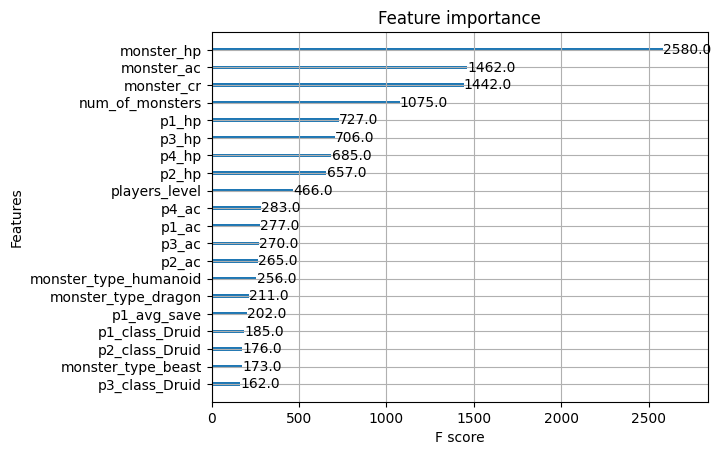

In [42]:
plot_importance(model_GCV, max_num_features=20, importance_type='weight')

# Hyperparameter tuning using Optuna

In [43]:
import optuna

c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\5e_encounter_predictor\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [55]:
from sklearn.metrics import mean_squared_error
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15, step=0.005),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'base_score': trial.suggest_float('base_score', 0.1, 0.9, step=0.1),
    }
    model = xgb.XGBRegressor(**param)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    return mean_squared_error(Y_test, Y_pred)

In [58]:
study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=100, n_jobs=-1)
study.best_params


[I 2023-11-25 13:35:32,631] A new study created in memory with name: regression
[I 2023-11-25 13:35:42,694] Trial 11 finished with value: 0.12624038370244117 and parameters: {'max_depth': 2, 'learning_rate': 0.015, 'n_estimators': 293, 'gamma': 0.4210291423617487, 'reg_lambda': 0.2398732973877504, 'scale_pos_weight': 8.641159749200504, 'base_score': 0.1}. Best is trial 11 with value: 0.12624038370244117.
[I 2023-11-25 13:35:43,878] Trial 9 finished with value: 0.1293281412540869 and parameters: {'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 240, 'gamma': 0.4737268532339173, 'reg_lambda': 0.6803419008191737, 'scale_pos_weight': 9.123767157663375, 'base_score': 0.9}. Best is trial 11 with value: 0.12624038370244117.
[I 2023-11-25 13:35:44,815] Trial 6 finished with value: 0.040569127558598546 and parameters: {'max_depth': 9, 'learning_rate': 0.15, 'n_estimators': 329, 'gamma': 0.5652824129341453, 'reg_lambda': 0.01862728697055962, 'scale_pos_weight': 6.971087040712001, 'base_sco

{'max_depth': 10,
 'learning_rate': 0.075,
 'n_estimators': 932,
 'gamma': 0.01283281652167223,
 'reg_lambda': 0.6319770124912486,
 'scale_pos_weight': 1.2769111785489868,
 'base_score': 0.1}

## Making the regression model

In [59]:
FINAL_PARAMETERS_OPT = study.best_params

model_OPT = xgb.XGBRegressor(**FINAL_PARAMETERS_OPT, booster='gbtree',early_stopping_rounds=10,eval_metric='rmse')
model_OPT.fit(  X_train,
            Y_train,
            eval_set=[(X_train, Y_train),(X_test, Y_test)],
            verbose=100
          )

[0]	validation_0-rmse:0.50614	validation_1-rmse:0.50720
[100]	validation_0-rmse:0.14161	validation_1-rmse:0.18655
[200]	validation_0-rmse:0.10832	validation_1-rmse:0.17156
[284]	validation_0-rmse:0.09941	validation_1-rmse:0.16876


XGBRegressor(base_score=0.1, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.01283281652167223, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.075, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=932, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## R² score of the model

In [60]:
model_OPT.score(X_test, Y_test)

0.8220413391704067

## Making predictions

In [86]:
predict(model_OPT)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
31355,28,18,3,29,14,3,19,16,3,16,...,False,False,False,False,False,False,False,False,False,False


The combat was btween 4 players level 3 against 3 monster(s) CR 2.0
Expected:  0.301412149328721
Predicted:  0.7288756


## Seeing the model feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

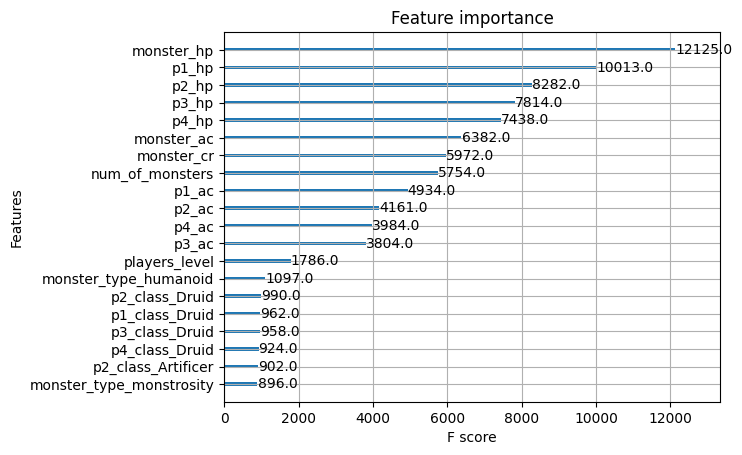

In [87]:
plot_importance(model_OPT, max_num_features=20, importance_type='weight')

# Scaling the data beforehand  

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
0,1.142363,-0.994428,0.815756,1.142561,-0.549501,0.815756,2.171498,1.227811,0.815756,1.535641,...,-0.234183,4.452864,-0.204969,-0.280604,-0.165443,-0.491422,-0.393591,-0.117455,-0.190493,-0.248779
1,0.034106,-0.994428,0.815756,0.984258,1.225473,0.815756,-0.836371,-0.554404,0.815756,0.113287,...,-0.234183,-0.224575,-0.204969,-0.280604,-0.165443,-0.491422,-0.393591,-0.117455,-0.190493,-0.248779
2,-0.520022,-0.994428,-1.225857,-0.915381,0.337986,-1.225857,-0.915526,0.782258,-1.225857,-0.755929,...,-0.234183,4.452864,-0.204969,-0.280604,-0.165443,-0.491422,-0.393591,-0.117455,-0.190493,-0.248779
3,0.667396,1.669817,0.815756,0.667651,2.112959,0.815756,-0.203136,2.118919,0.815756,0.271326,...,-0.234183,-0.224575,-0.204969,-0.280604,-0.165443,-0.491422,-0.393591,-0.117455,-0.190493,-0.248779
4,0.192429,-0.994428,0.815756,0.825955,0.337986,0.815756,0.113482,-0.554404,0.815756,0.113287,...,-0.234183,-0.224575,-0.204969,-0.280604,-0.165443,2.034911,-0.393591,-0.117455,-0.190493,-0.248779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102802,-0.994989,0.337694,-1.225857,-1.469442,-1.880731,-1.225857,-1.073835,-0.108850,-1.225857,-1.467106,...,-0.234183,-0.224575,-0.204969,-0.280604,-0.165443,-0.491422,-0.393591,-0.117455,-0.190493,-0.248779
102803,-0.440861,0.337694,0.815756,1.617470,-0.993244,0.815756,1.221644,-0.999957,0.815756,1.377602,...,-0.234183,-0.224575,-0.204969,-0.280604,-0.165443,-0.491422,2.540706,-0.117455,-0.190493,-0.248779
102804,-1.390795,-0.550387,-1.225857,-1.311138,-1.880731,-1.225857,-1.311298,0.336704,-1.225857,-0.992988,...,-0.234183,-0.224575,-0.204969,-0.280604,-0.165443,2.034911,-0.393591,-0.117455,-0.190493,-0.248779
102805,-1.311634,-1.882510,-1.225857,-0.282168,0.337986,-1.225857,-0.598908,-0.108850,-1.225857,-0.281811,...,-0.234183,-0.224575,-0.204969,-0.280604,-0.165443,-0.491422,-0.393591,-0.117455,-0.190493,-0.248779


In [45]:
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(X_scaled, Y, test_size=.2)

# Optune with scaled data

In [46]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15, step=0.005),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'base_score': trial.suggest_float('base_score', 0.1, 0.9, step=0.1),
    }
    model = xgb.XGBRegressor(**param)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    return mean_squared_error(Y_test, Y_pred)

In [48]:
from sklearn.metrics import mean_squared_error

study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=100, n_jobs=-1)
study.best_params

[I 2023-12-02 19:30:08,404] A new study created in memory with name: regression
[I 2023-12-02 19:30:15,852] Trial 8 finished with value: 0.09616359373890407 and parameters: {'max_depth': 3, 'learning_rate': 0.045000000000000005, 'n_estimators': 129, 'gamma': 0.9899003589466662, 'reg_lambda': 0.04495289821264298, 'scale_pos_weight': 9.274441201805384, 'base_score': 0.1}. Best is trial 8 with value: 0.09616359373890407.
[I 2023-12-02 19:30:21,147] Trial 10 finished with value: 0.11067169328596753 and parameters: {'max_depth': 1, 'learning_rate': 0.045000000000000005, 'n_estimators': 667, 'gamma': 0.30812823106028403, 'reg_lambda': 0.8980068405844858, 'scale_pos_weight': 8.796565468431677, 'base_score': 0.2}. Best is trial 8 with value: 0.09616359373890407.
[I 2023-12-02 19:30:21,500] Trial 0 finished with value: 0.0404311720208076 and parameters: {'max_depth': 9, 'learning_rate': 0.11499999999999999, 'n_estimators': 362, 'gamma': 0.49404699938470203, 'reg_lambda': 0.17148980699881927, 's

{'max_depth': 10,
 'learning_rate': 0.15,
 'n_estimators': 148,
 'gamma': 0.010611942185156736,
 'reg_lambda': 0.3260600665395331,
 'scale_pos_weight': 1.3467533682138497,
 'base_score': 0.8}

In [49]:
FINAL_PARAMETERS_OPT_SCALED = study.best_params

model_OPT_SCALED = xgb.XGBRegressor(**FINAL_PARAMETERS_OPT_SCALED, booster='gbtree',early_stopping_rounds=10,eval_metric='rmse')
model_OPT_SCALED.fit(
            X_train_scaled,
            Y_train_scaled,
            eval_set=[(X_train_scaled, Y_train_scaled),(X_test_scaled, Y_test_scaled)],
            verbose=100
          )

[0]	validation_0-rmse:0.46400	validation_1-rmse:0.46483
[100]	validation_0-rmse:0.10883	validation_1-rmse:0.17410
[136]	validation_0-rmse:0.09775	validation_1-rmse:0.17058


XGBRegressor(base_score=0.8, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.010611942185156736, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=148, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
model_OPT_SCALED.score(X_test_scaled, Y_test_scaled)

0.8161983602207488

In [72]:
predict(model_OPT_SCALED, X_test_scaled)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
46921,0.27159,1.225776,0.815756,0.905106,-0.105757,0.815756,1.617416,-0.10885,0.815756,1.061523,...,-0.234183,-0.224575,4.878796,-0.280604,-0.165443,-0.491422,-0.393591,-0.117455,-0.190493,-0.248779


The combat was between 4 players level 0.7040721873611758 against 1.1897813679874498 monster(s) CR -0.8322533824608633
Expected:  0.0
Predicted:  0.6051157


<Axes: title={'center': 'Scaled'}, xlabel='F score', ylabel='Features'>

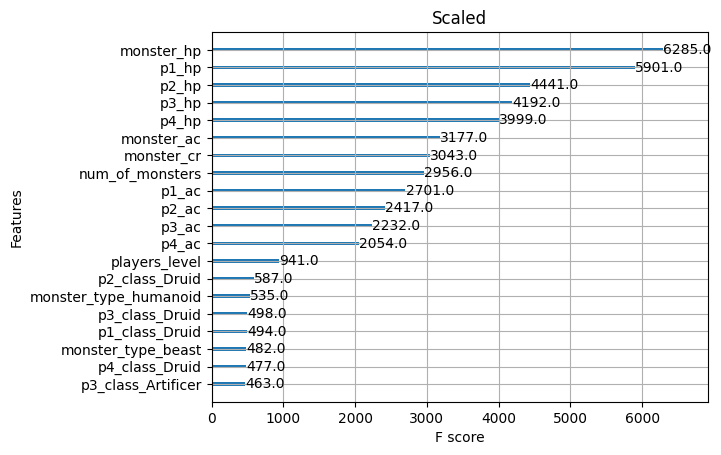

In [66]:
plot_importance(model_OPT_SCALED, max_num_features=20, importance_type='weight', title='Scaled')